# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [128]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [92]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [93]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [94]:
sensor.shape

(1751, 12)

In [95]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


In [96]:
rows = len(sensor.index)

- #### There is no missing data in any column or row

How many rows and columns are in our data?

- #### This dataframe has 11 columns and 1751 rows

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [97]:
dates = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods = rows)

In [98]:
freq = pd.infer_freq(dates)
dates.freq = freq

In [99]:
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

In [100]:
sensor.index = dates

Assign the time series index to the dataframe's index.

In [103]:
sensor.index = pd.to_datetime(sensor.index)

In [50]:
sensor.drop(columns = "dates", inplace = True)

In [51]:
sensor.sample(2)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
dates,,,,,,,,,,,,
2018-01-01 00:22:50,1.214966,-0.577456,1.636759,0.785369,0.545895,-0.291882,-1.312165,-3.205305,0.823251,0.633607,-0.079693,0.617688
2018-01-01 00:17:49,1.512954,-0.792463,-2.270180,0.700920,0.712085,-0.040588,-1.198463,-3.366575,0.284833,0.206963,-0.129321,0.212432


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<AxesSubplot:title={'center':'Sensor metrics'}>

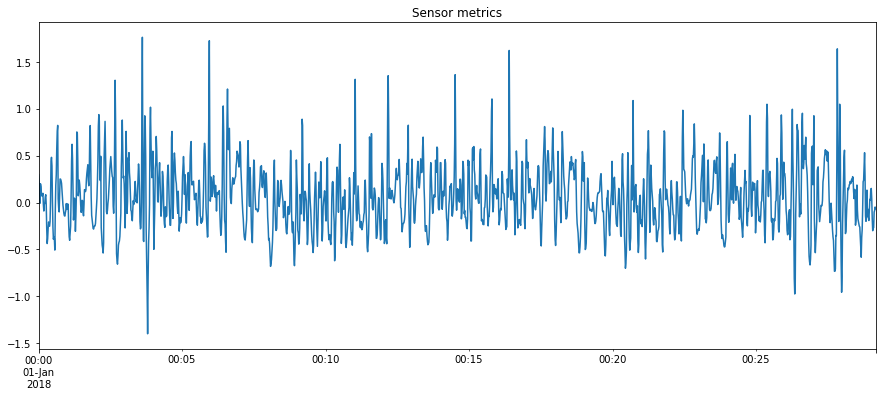

In [105]:
sensor["userAcceleration.x"].plot(figsize=(15,6), title="Sensor metrics")

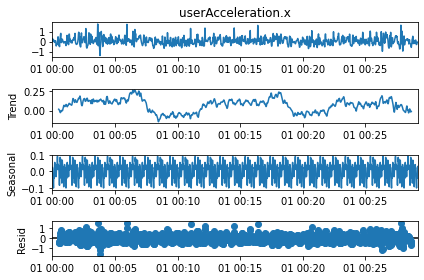

In [106]:
acc_x_decompose_graph = seasonal_decompose(sensor["userAcceleration.x"], period=60)
acc_x_decompose_graph.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

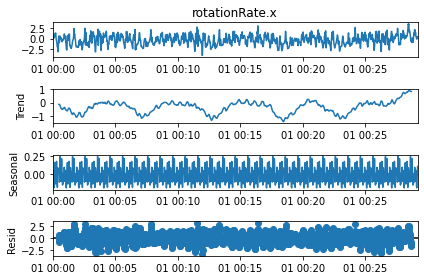

In [107]:
rot_x_decompose_graph = seasonal_decompose(sensor["rotationRate.x"], period=60)
rot_x_decompose_graph.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [82]:
sensor_t = sensor[:-1]
sensor_t_plus_1 = sensor[1:]

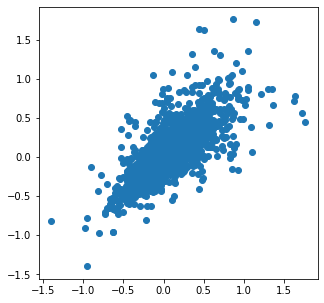

In [83]:
plt.figure(figsize=(5,5))
plt.scatter(sensor_t["userAcceleration.x"], sensor_t_plus_1["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

In [85]:
np.corrcoef(sensor_t["userAcceleration.x"], sensor_t_plus_1["userAcceleration.x"])

array([[1.        , 0.75970362],
       [0.75970362, 1.        ]])

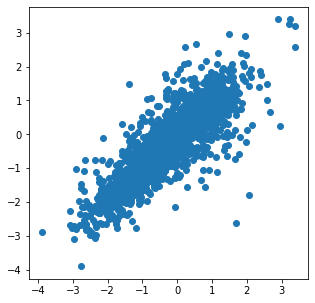

In [84]:
plt.figure(figsize=(5,5))
plt.scatter(sensor_t["rotationRate.x"], sensor_t_plus_1["rotationRate.x"])

In [86]:
np.corrcoef(sensor_t["rotationRate.x"], sensor_t_plus_1["rotationRate.x"])

array([[1.        , 0.84709047],
       [0.84709047, 1.        ]])

What are your conclusions from both visualizations?

- #### We can estimate both with some exactitude:
- #### For userAcceleration.x we have a 0.759 of correlation. It's not a very good correlation but we can estimate it.
- #### For rotationRate.x we have a 0.847 of correlation (much more precise prediction than the other)

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [89]:
adf_test1 = adfuller(sensor["userAcceleration.x"])
adf_test1                 

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [91]:
adf_test2 = adfuller(sensor["rotationRate.x"])
adf_test2

(-5.269860625086417,
 6.320230335912331e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

- #### For "userAcceleration.x" we can say that it's stationary with 99% of certainty (-17.957 < -3.434)
- #### For "rotationRate.x" we also can say that it's stationary but it's much close with our 99% of certainty treshold (-5.269 < -3.434)

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [108]:
from statsmodels.tsa.arima_model import ARMA

In [111]:
sensor["userAcceleration.x"][:-10]

2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
                         ...   
2018-01-01 00:28:56   -0.191617
2018-01-01 00:28:57   -0.081173
2018-01-01 00:28:58    0.033395
2018-01-01 00:28:59    0.028120
2018-01-01 00:29:00    0.140211
Freq: S, Name: userAcceleration.x, Length: 1741, dtype: float64

In [112]:
sensor["userAcceleration.x"][-10:]

2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Freq: S, Name: userAcceleration.x, dtype: float64

In [116]:
arma_model = ARMA(endog=sensor["userAcceleration.x"][:-10], order=(2, 1)).fit()
print(arma_model.summary())

/home/ccastrob/anaconda3/envs/ironhack/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                     ARMA(2, 1)   Log Likelihood                 373.401
Method:                       css-mle   S.D. of innovations              0.195
Date:                Wed, 07 Jul 2021   AIC                           -736.803
Time:                        17:34:51   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0637      0.014      4.503      0.000       0.036       0.091
ar.L1.userAcceleration.x     0.9882      0.044     22.639      0.000       0.903       1.

In [124]:
sensor.index[-10:]

DatetimeIndex(['2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', freq='S')

- #### Real data plot:

<AxesSubplot:>

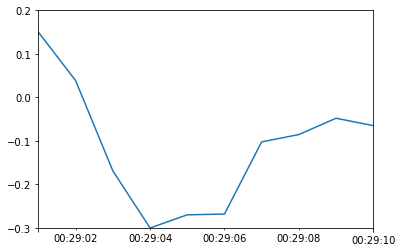

In [135]:
sensor["userAcceleration.x"][-10:].plot(ylim=(-0.3, 0.2))

In [126]:
prediction = arma_model.predict('2018-01-01 00:29:01', '2018-01-01 00:29:10')

- #### Predicted data plot:

<AxesSubplot:>

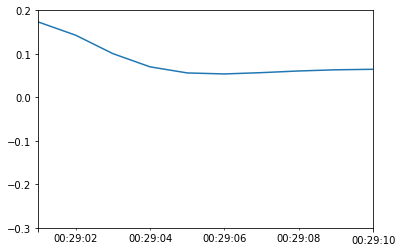

In [136]:
prediction.plot(ylim=(-0.3, 0.2))

- #### It's not a bad prediction but could be better.

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [131]:
from statsmodels.tools.eval_measures import rmse

In [133]:
real_data = sensor["userAcceleration.x"][-10:]

rmse(prediction, real_data)

0.22529864371476288

- #### RMSE it's even more popular than the MSE. It's the square root fo the MSE and measures standard deviation from the residuals.  
- #### We always want that the RMSE it as much closer as 0 as we can.
- #### In this case RMSE is 0.22. It's closer to 0, so our model it's good because it can predict future events with a low error.